# Testing for Generating Randomized Geological Histories

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pyvista as pv

from structgeo.model import geo
import structgeo.plot as geovis
from structgeo.model import history as geohistory
import structgeo.probability as rv

pv.set_jupyter_backend('static')

In [43]:
# Set random seed for reproducibility
# random_seed = 1234
# np.random.seed(random_seed)

In [44]:
# Start with some model specifications
# Randomize the bounds size between 10 and 100
resolution = 128
max_x = float(np.random.randint(10, 100))
min_x = - max_x
model_size = max_x - min_x
bounds = (min_x,max_x)
model = geo.GeoModel(bounds, resolution)
print(f"Model created with bounds {bounds} and resolution {resolution}")

Model created with bounds (-96.0, 96.0) and resolution 128


In [45]:
# Make an origin generator for generating feature origins
def get_origin_generator(bounds):
    def origin_generator():
        return rv.random_point_in_ellipsoid(bounds)
    return origin_generator

origin_generator = get_origin_generator(bounds)

for i in range(5):
    origin = origin_generator()
    print(f"Origin {i}: {origin}")

Origin 0: (-0.4637079575587537, 0.9987742482188311, -0.24727802147356967)
Origin 1: (0.1621492027564712, -0.1428785021287967, 41.916124451355515)
Origin 2: (-13.441528083963956, 3.642203479377355, 89.19492744442219)
Origin 3: (-0.4873780914991386, 3.706830104904469, -3.0558531565717795)
Origin 4: (-5.616262753298567, -4.8926627110082705, 25.750726655428473)


In [46]:
# random bedrock in lower 1/4 of model
base = min_x + model_size / 4 + np.random.normal(0, model_size / 10)
value = 3
bedrock = geo.Bedrock(base,value)
print(f"Bedrock defined at {base} with value {value}")

Bedrock defined at -72.09823182786646 with value 3


In [47]:
# Random sedimentary layer filled to around 1/2 of the model
height = base + model_size / 3 + np.random.normal(0, model_size / 10)
height = max(height, base + model_size/10)
avg_thickness = (height-base)/10
print(f"Average thickness of sedimentary layer is {avg_thickness}")
sediment = geo.Sedimentation(height=height, value_list = range(4,100), thickness_callable = lambda: np.random.lognormal(np.log(avg_thickness),1))
print(f"Sedimentary layer defined at {height} with values {sediment.value_list}")

Average thickness of sedimentary layer is 5.578627203382348
Sedimentary layer defined at -16.311959794042973 with values range(4, 100)


In [48]:
# Add random dike
strike = rv.random_angle_degrees()
dip = np.random.uniform(60,120)
width = np.random.uniform(2,model_size/5)
origin = origin_generator()
value = 0

dike = geo.Dike(strike=strike, dip=dip, width=width, origin=origin, value=value)

print(f"Dike defined with strike {strike}, dip {dip}, width {width}, origin {origin} and value {value}")

Dike defined with strike 219.18600728390712, dip 88.55813427591036, width 29.363040238631886, origin (-79.27930813553047, -29.2083828306095, 33.84557544521663) and value 0


In [49]:
# Add random tilt
strike = rv.random_angle_degrees()
dip = np.random.uniform(0,35)
origin = origin_generator()
tilt = geo.Tilt(strike=strike, dip=dip, origin=origin)

In [50]:
# add random fold
strike = rv.random_angle_degrees()
dip = np.random.uniform(60,120)
rake = rv.random_angle_degrees()
origin = origin_generator()
amplitude = np.random.uniform(0, model_size/8)
period = np.random.uniform(model_size/2, model_size*4)
periodic_func = rv.fourier_series_wave(num_harmonics=8)
fold = geo.Fold(strike=strike, dip=dip, rake=rake, origin=origin, amplitude=amplitude, period=period, periodic_func=periodic_func)


In [51]:
# Add random fault
strike = rv.random_angle_degrees()
dip = np.random.uniform(60,100)
rake = np.random.uniform(0,180)
amplitude = np.random.uniform(2, model_size/20)
origin = origin_generator()
fault = geo.Fault(strike=strike, dip=dip, rake=rake, origin=origin, amplitude=amplitude)


Target height: 79.97


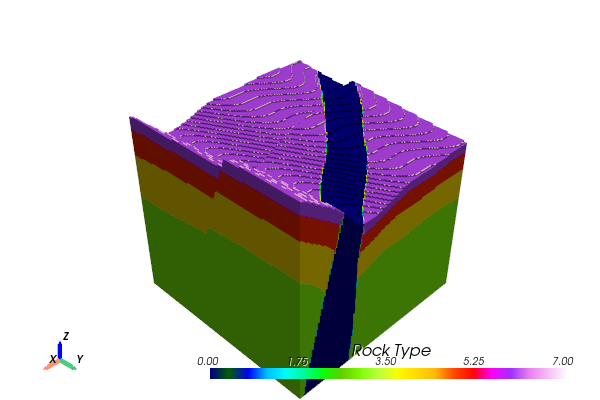

In [52]:
model.clear_history()
model.add_history([bedrock, sediment, dike, tilt, fold, fault])
model.compute_model()
model.renormalize_height(auto = True)
p = geovis.volview(model)
p.show(window_size=[600,400])

In [53]:
def generate_model():
    # Start with some model specifications
    # Randomize the bounds size between 10 and 100
    resolution = 128
    max_x = 10
    min_x = - max_x
    model_size = max_x - min_x
    bounds = (min_x,max_x)
    model = geo.GeoModel(bounds, resolution)
    print(f"Model created with bounds {bounds} and resolution {resolution}")

    # Make an origin generator for generating feature origins
    def get_origin_generator(bounds):
        def origin_generator():
            return rv.random_point_in_ellipsoid(bounds)
        return origin_generator

    origin_generator = get_origin_generator(bounds)

    for i in range(5):
        origin = origin_generator()
        
        # random bedrock in lower 1/4 of model
    base = min_x + model_size / 4 + np.random.normal(0, model_size / 10)
    value = 3
    bedrock = geo.Bedrock(base,value)
    print(f"Bedrock defined at {base} with value {value}")

    # Random sedimentary layer filled to around 1/2 of the model
    height = base + model_size / 3 + np.random.normal(0, model_size / 10)
    height = max(height, base + model_size/10)
    avg_thickness = (height-base)/10
    print(f"Average thickness of sedimentary layer is {avg_thickness}")
    sediment = geo.Sedimentation(height=height, value_list = range(4,100), thickness_callable = lambda: np.random.lognormal(np.log(avg_thickness),1))
    print(f"Sedimentary layer defined at {height} with values {sediment.value_list}")

    # Add random dike
    strike = rv.random_angle_degrees()
    dip = np.random.uniform(60,120)
    width = np.random.uniform(2,model_size/5)
    origin = origin_generator()
    value = 0

    dike = geo.Dike(strike=strike, dip=dip, width=width, origin=origin, value=value)

    print(f"Dike defined with strike {strike}, dip {dip}, width {width}, origin {origin} and value {value}")

    # Add random tilt
    strike = rv.random_angle_degrees()
    dip = np.random.uniform(0,35)
    origin = origin_generator()
    tilt = geo.Tilt(strike=strike, dip=dip, origin=origin)

    # add random fold
    strike = rv.random_angle_degrees()
    dip = np.random.uniform(60,120)
    rake = rv.random_angle_degrees()
    origin = origin_generator()
    amplitude = np.random.uniform(0, model_size/8)
    period = np.random.uniform(model_size/2, model_size*4)
    periodic_func = rv.fourier_series_wave(num_harmonics=8)
    fold = geo.Fold(strike=strike, dip=dip, rake=rake, origin=origin, amplitude=amplitude, period=period, periodic_func=periodic_func)

    # Add random fault
    strike = rv.random_angle_degrees()
    dip = np.random.uniform(60,100)
    rake = np.random.uniform(0,180)
    amplitude = np.random.uniform(2, model_size/20)
    origin = origin_generator()
    fault = geo.Fault(strike=strike, dip=dip, rake=rake, origin=origin, amplitude=amplitude)

    # Gen
    model.clear_history()
    model.add_history([bedrock, sediment, dike, tilt, fold, fault])
    model.compute_model()
    model.renormalize_height(auto = True)
    return model

In [54]:
from structgeo.data.model_reviewer import ModelReviewer
DEFAULT_BASE_DIR = "../single_fault"

reviewer = ModelReviewer(generate_model_func=generate_model, base_dir=DEFAULT_BASE_DIR)
reviewer.start_review()

Model created with bounds (-10, 10) and resolution 128
Bedrock defined at -1.932414075388082 with value 3
Average thickness of sedimentary layer is 0.7941751247031716
Sedimentary layer defined at 6.009337171643635 with values range(4, 100)
Dike defined with strike 141.76701550283013, dip 97.17127889611788, width 3.0073089065547647, origin (0.4025913582721427, 0.8406645809440625, -9.851022520300063) and value 0
Target height: 5.41


Output()

Model discarded.
Model created with bounds (-10, 10) and resolution 128
Bedrock defined at -5.892079023000332 with value 3
Average thickness of sedimentary layer is 0.49622841899804637
Sedimentary layer defined at -0.9297948330198689 with values range(4, 100)
Dike defined with strike 183.56191501983605, dip 62.83148128656216, width 2.887712485200238, origin (-1.3628537574538289, 9.49437812382501, -1.045137406045394) and value 0
Target height: 6.17


Model discarded.
Model created with bounds (-10, 10) and resolution 128
Bedrock defined at -3.5537177429533022 with value 3
Average thickness of sedimentary layer is 0.7206963999411237
Sedimentary layer defined at 3.6532462564579347 with values range(4, 100)
Dike defined with strike 343.2158841176742, dip 112.06731260685072, width 3.272921637025126, origin (-0.4831645963084879, 0.14928700587414578, 1.1249875257153161) and value 0
Target height: 5.10


Model discarded.
Model created with bounds (-10, 10) and resolution 128
Bedrock defined at -3.8910998492208626 with value 3
Average thickness of sedimentary layer is 0.6542942231598513
Sedimentary layer defined at 2.6518423823776507 with values range(4, 100)
Dike defined with strike 35.93236946310426, dip 97.30251210462775, width 3.5328252122662542, origin (4.852181447076378, 1.4669236372495418, -1.612754012610754) and value 0
Target height: 6.37


Model discarded.
Model created with bounds (-10, 10) and resolution 128
Bedrock defined at -7.817497724158464 with value 3
Average thickness of sedimentary layer is 0.7302010817755021
Sedimentary layer defined at -0.515486906403443 with values range(4, 100)
Dike defined with strike 194.35180802716647, dip 80.89277782175921, width 3.8810593251497805, origin (4.728315782224484, -0.5423031489283745, 0.4619937978030992) and value 0
Target height: 5.15


Model discarded.
Model created with bounds (-10, 10) and resolution 128
Bedrock defined at -5.28496792281961 with value 3
Average thickness of sedimentary layer is 0.4959070219929528
Sedimentary layer defined at -0.3258977028900827 with values range(4, 100)
Dike defined with strike 112.18889721168146, dip 67.37050099712107, width 2.496635900296092, origin (-2.9196126884479723, 6.107099491302936, -1.7773033845740183) and value 0
Target height: 5.43


Model discarded.
Model created with bounds (-10, 10) and resolution 128
Bedrock defined at -3.1251689706262544 with value 3
Average thickness of sedimentary layer is 1.0673819563113849
Sedimentary layer defined at 7.5486505924875935 with values range(4, 100)
Dike defined with strike 340.8234654088415, dip 67.80140535091152, width 2.548731478637783, origin (-0.21520640081339876, 1.2208387126255216, 8.856326519138548) and value 0
Target height: 8.34


Model discarded.
Model created with bounds (-10, 10) and resolution 128
Bedrock defined at -2.0798458582634147 with value 3
Average thickness of sedimentary layer is 0.6697649873395283
Sedimentary layer defined at 4.617804015131868 with values range(4, 100)
Dike defined with strike 319.38243247681925, dip 104.17298960769425, width 3.836354176995475, origin (0.6108317736994119, 7.581015080087505, -3.855597941141908) and value 0
Target height: 5.41


Model discarded.
Model created with bounds (-10, 10) and resolution 128
Bedrock defined at -7.353423740662875 with value 3
Average thickness of sedimentary layer is 0.8532444901433367
Sedimentary layer defined at 1.1790211607704912 with values range(4, 100)
Dike defined with strike 127.92909841135922, dip 84.08220941145596, width 3.6166753722830833, origin (3.4396647067711688, -1.4942417698861217, 0.6084126081567746) and value 0
Target height: 6.88


Model discarded.
Model created with bounds (-10, 10) and resolution 128
Bedrock defined at -6.7321253070913425 with value 3
Average thickness of sedimentary layer is 0.9653533907379822
Sedimentary layer defined at 2.9214086002884803 with values range(4, 100)
Dike defined with strike 235.97888830915542, dip 72.14808734344187, width 3.505966962218956, origin (4.722156424281554, -2.1205988085263145, -2.062581634921879) and value 0
Target height: 3.91


Model discarded.
Model created with bounds (-10, 10) and resolution 128
Bedrock defined at -6.954520959468686 with value 3
Average thickness of sedimentary layer is 0.7336124143685672
Sedimentary layer defined at 0.3816031842169847 with values range(4, 100)
Dike defined with strike 293.5907932857869, dip 84.55720828981345, width 3.984738718088411, origin (-0.020221037742520726, -1.3241310174041505, -2.449716992520861) and value 0
Target height: 5.93


Model discarded.
Model created with bounds (-10, 10) and resolution 128
Bedrock defined at -1.2924890480740996 with value 3
Average thickness of sedimentary layer is 0.7079036497621564
Sedimentary layer defined at 5.786547449547464 with values range(4, 100)
Dike defined with strike 319.4045624450777, dip 118.93578500312074, width 2.2795717118961347, origin (3.7464124611600362, 0.9182114697622611, 7.43980629738655) and value 0
Target height: 7.07


Model discarded.
Model created with bounds (-10, 10) and resolution 128
Bedrock defined at -1.5656650420887956 with value 3
Average thickness of sedimentary layer is 0.6888401501402582
Sedimentary layer defined at 5.322736459313787 with values range(4, 100)
Dike defined with strike 217.6171838190409, dip 88.25942263622919, width 3.624835636972757, origin (-1.83202624771427, -0.33472273188040186, -5.826181093557365) and value 0
Target height: 5.66


Model discarded.
Model created with bounds (-10, 10) and resolution 128
Bedrock defined at -6.7368864824063195 with value 3
Average thickness of sedimentary layer is 0.4808684827154425
Sedimentary layer defined at -1.928201655251894 with values range(4, 100)
Dike defined with strike 20.560646280728253, dip 116.06478252936834, width 3.272910088774413, origin (0.26929092670226995, -0.6857175552296073, -1.803673622619809) and value 0
Target height: 4.88


Model discarded.
Model created with bounds (-10, 10) and resolution 128
Bedrock defined at -4.247316390120258 with value 3
Average thickness of sedimentary layer is 0.709146886612624
Sedimentary layer defined at 2.844152476005981 with values range(4, 100)
Dike defined with strike 265.3151503939035, dip 90.57717046151068, width 3.1012298459392063, origin (7.476492117961139, 4.720039563838627, 2.196862371371165) and value 0
Target height: 5.04
